In [1]:
# Imports
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size + 1], df[train_size:]

In [3]:
# Storing models for each age group
models = {}

# To be used in evaluation
forecasts = []
rmses = []

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    y = train[ag]
    
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True)
    models[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)
    rmses.append(root_mean_squared_error(test[ag], forecast))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=277.069, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=325.526, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=320.244, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=275.926, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=319.861, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=274.924, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=277.241, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.232, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=266.662, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.488, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=267.698, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 se

In [4]:
for forecast, ag, rmse in zip(forecasts, age_groups, rmses):
    print(f'{ag} forecast:\n{forecast}')
    print(f'RMSE: {rmse}\n')

Under 1 year forecast:
13    61532.033180
14    61852.204777
15    61852.204777
16    61852.204777
dtype: float64
RMSE: 6358.00575457292

1 - 4 years forecast:
13    241338.404838
14    246128.884756
15    246128.884756
16    246128.884756
dtype: float64
RMSE: 24078.462577843613

5 - 9 years forecast:
13    257240.091560
14    269324.440753
15    291595.686161
16    317039.914942
dtype: float64
RMSE: 26186.623872497006

10 - 14 years forecast:
13    267550.682591
14    268337.877677
15    279767.672123
16    293455.761124
dtype: float64
RMSE: 19708.609453528323

15 - 19 years forecast:
13    297952.413077
14    273254.557910
15    262126.284332
16    254043.489499
dtype: float64
RMSE: 28881.090242880593

20 - 24 years forecast:
13    356195.768350
14    351211.135335
15    349502.852398
16    345421.036097
dtype: float64
RMSE: 46738.73168140677

25 - 29 years forecast:
13    317037.950352
14    304056.348516
15    287573.415454
16    272854.928513
dtype: float64
RMSE: 51952.96230747711

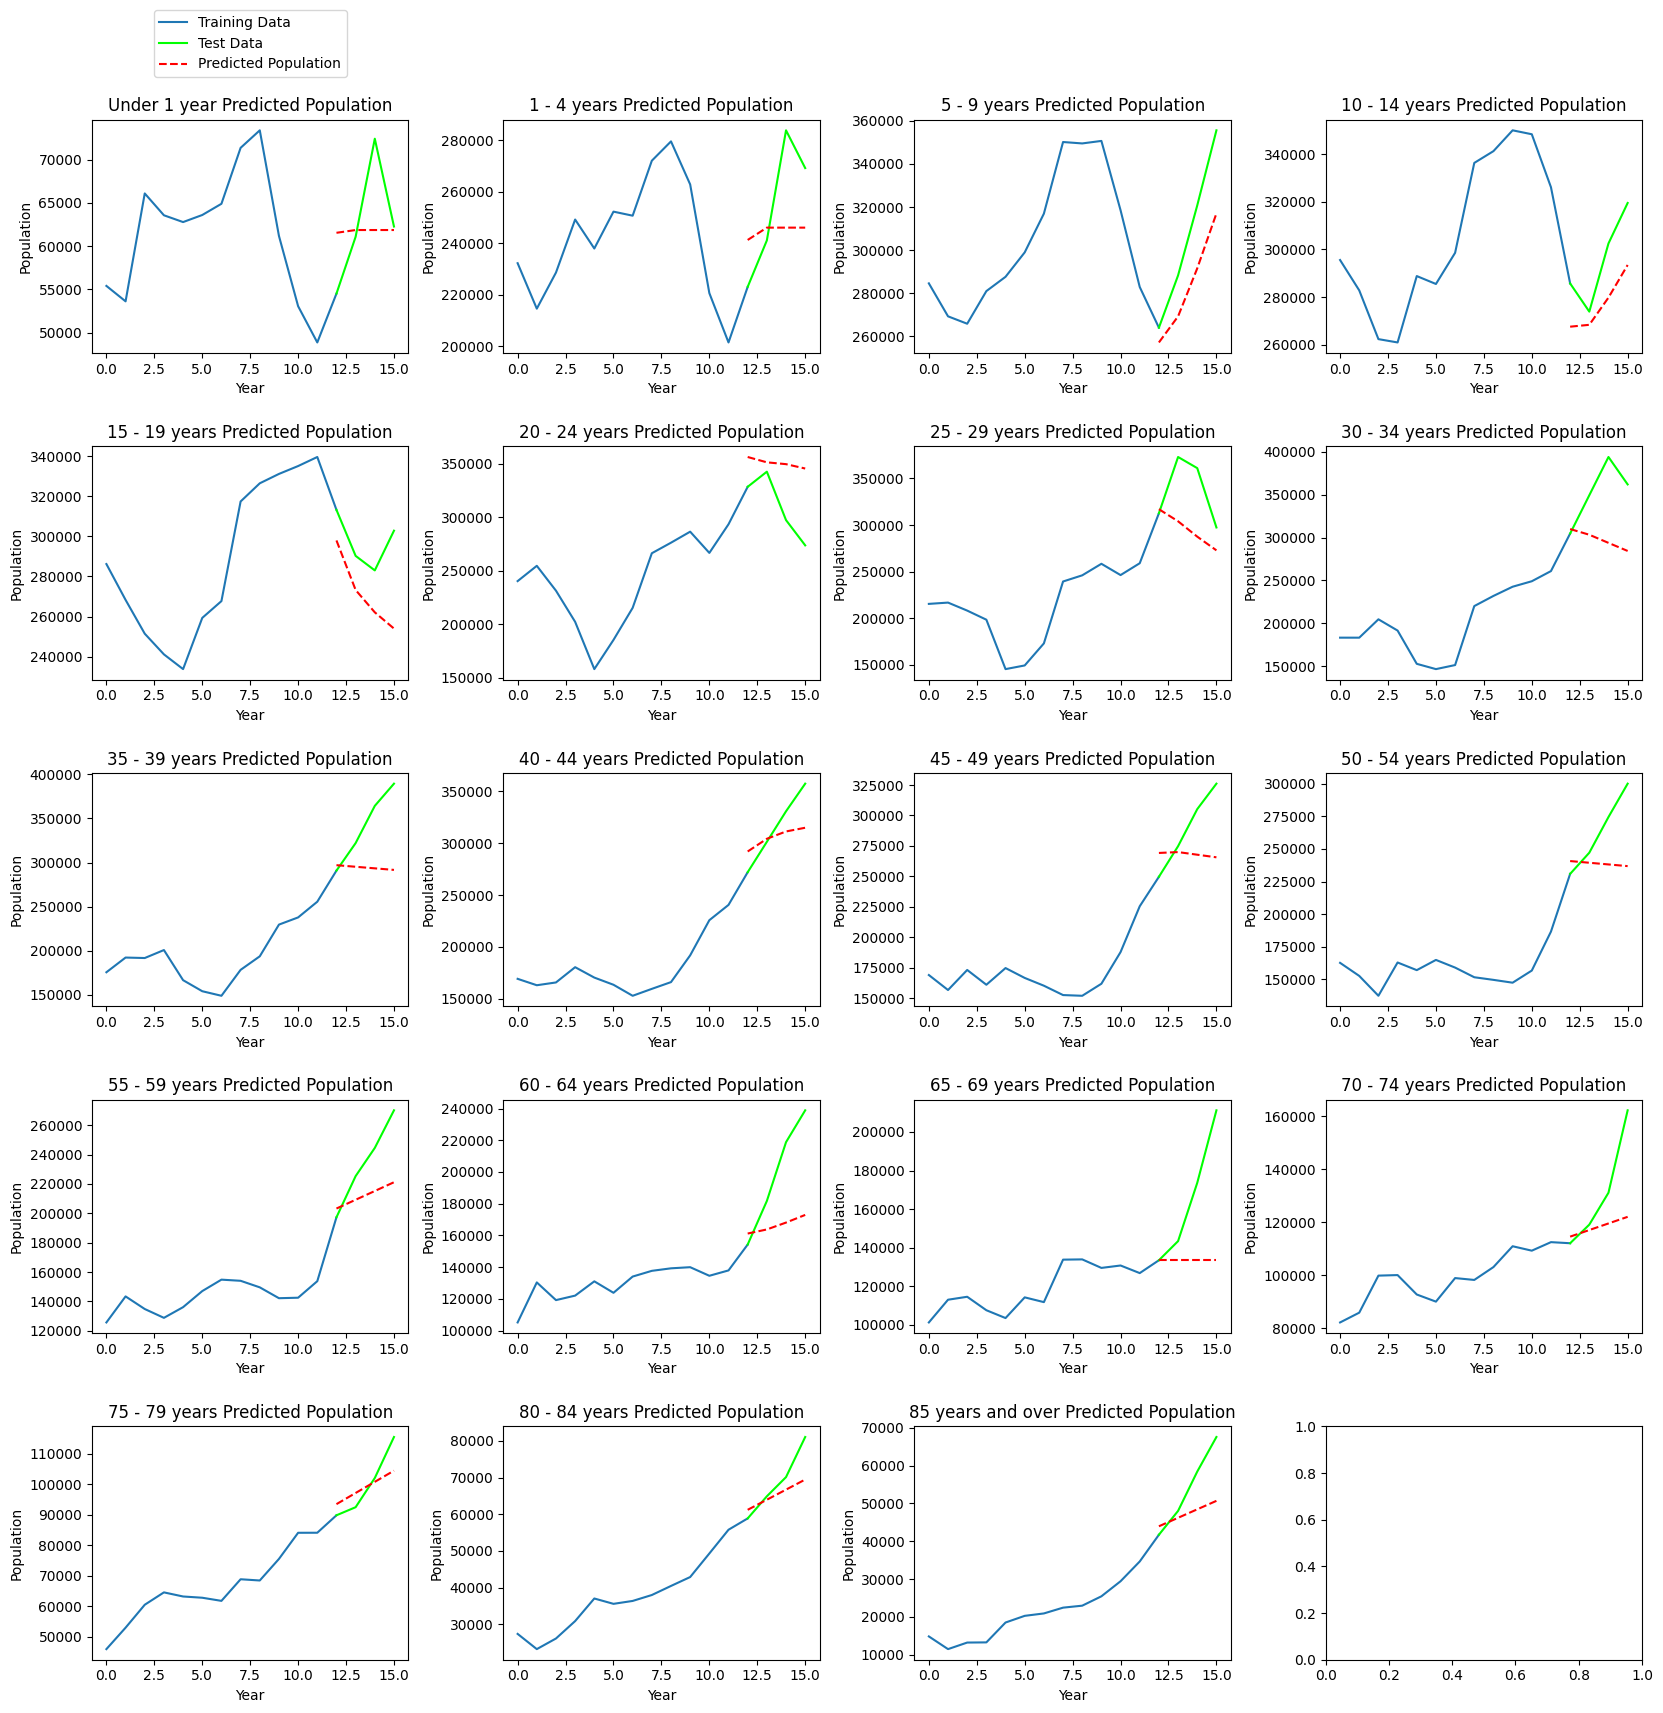

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, forecast, ax in zip(age_groups, forecasts, axes):
    y = train[ag]
    y_test = test[ag]
    
    ax.plot(train.index, y, label='Training Data')
    ax.plot(test.index, y_test, label='Test Data', color='lime')
    ax.plot(test.index, forecast, label=f'Predicted Population', color='red', linestyle='--')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    # ax.set_ylim(bottom=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

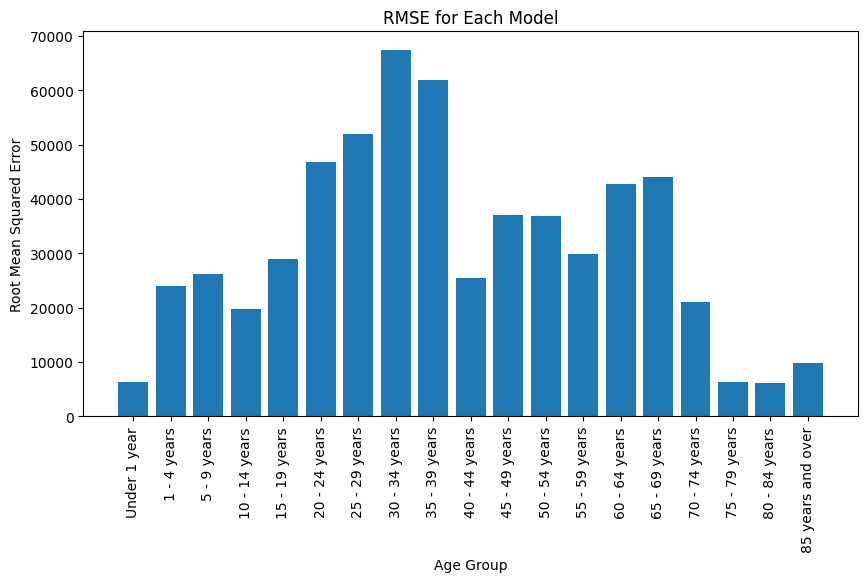

Average RMSE: 31184.08
Average RMSE for elderly populations: 17476.75


In [6]:
# Plotting each model's root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', avg_rmse)

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', avg_rmse)

### Using the supplemented dataset

In [7]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/PopByAgeGroupSupplemented.csv')
df.drop(columns=['STATISTIC', 'UNIT'], inplace=True)

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size + 1], df[train_size:]

In [8]:
# Storing models for each age group
models = {}

# To be used in evaluation
forecasts = []
rmses = []

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    y = train[ag]
    
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True)
    models[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)
    rmses.append(root_mean_squared_error(test[ag], forecast))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=678.096, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=270.807, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=269.932, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=271.100, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=274.880, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] 

In [9]:
for forecast, ag, rmse in zip(forecasts, age_groups, rmses):
    print(f'{ag} forecast:\n{forecast}')
    print(f'RMSE: {rmse}\n')

Under 1 year forecast:
61    76.041380
62    76.929955
63    77.614881
64    78.135765
65    78.524525
66    78.806879
67    79.003552
68    79.131244
69    79.203410
70    79.230896
71    79.222438
72    79.185077
73    79.124487
74    79.045238
75    78.951015
dtype: float64
RMSE: 16.751440804948544

1 - 4 years forecast:
61    279.939309
62    285.958665
63    290.285108
64    293.040665
65    294.304361
66    294.147010
67    292.649958
68    289.914256
69    286.063988
70    281.245986
71    275.627259
72    269.390991
73    262.731639
74    255.849560
75    248.945429
dtype: float64
RMSE: 19.894235875014438

5 - 9 years forecast:
61    318.976826
62    322.743102
63    325.886937
64    328.368995
65    330.169743
66    331.288616
67    331.742751
68    331.565343
69    330.803701
70    329.517068
71    327.774277
72    325.651325
73    323.228912
74    320.590038
75    317.817699
dtype: float64
RMSE: 18.78216493163615

10 - 14 years forecast:
61    300.038727
62    302.659598
63 

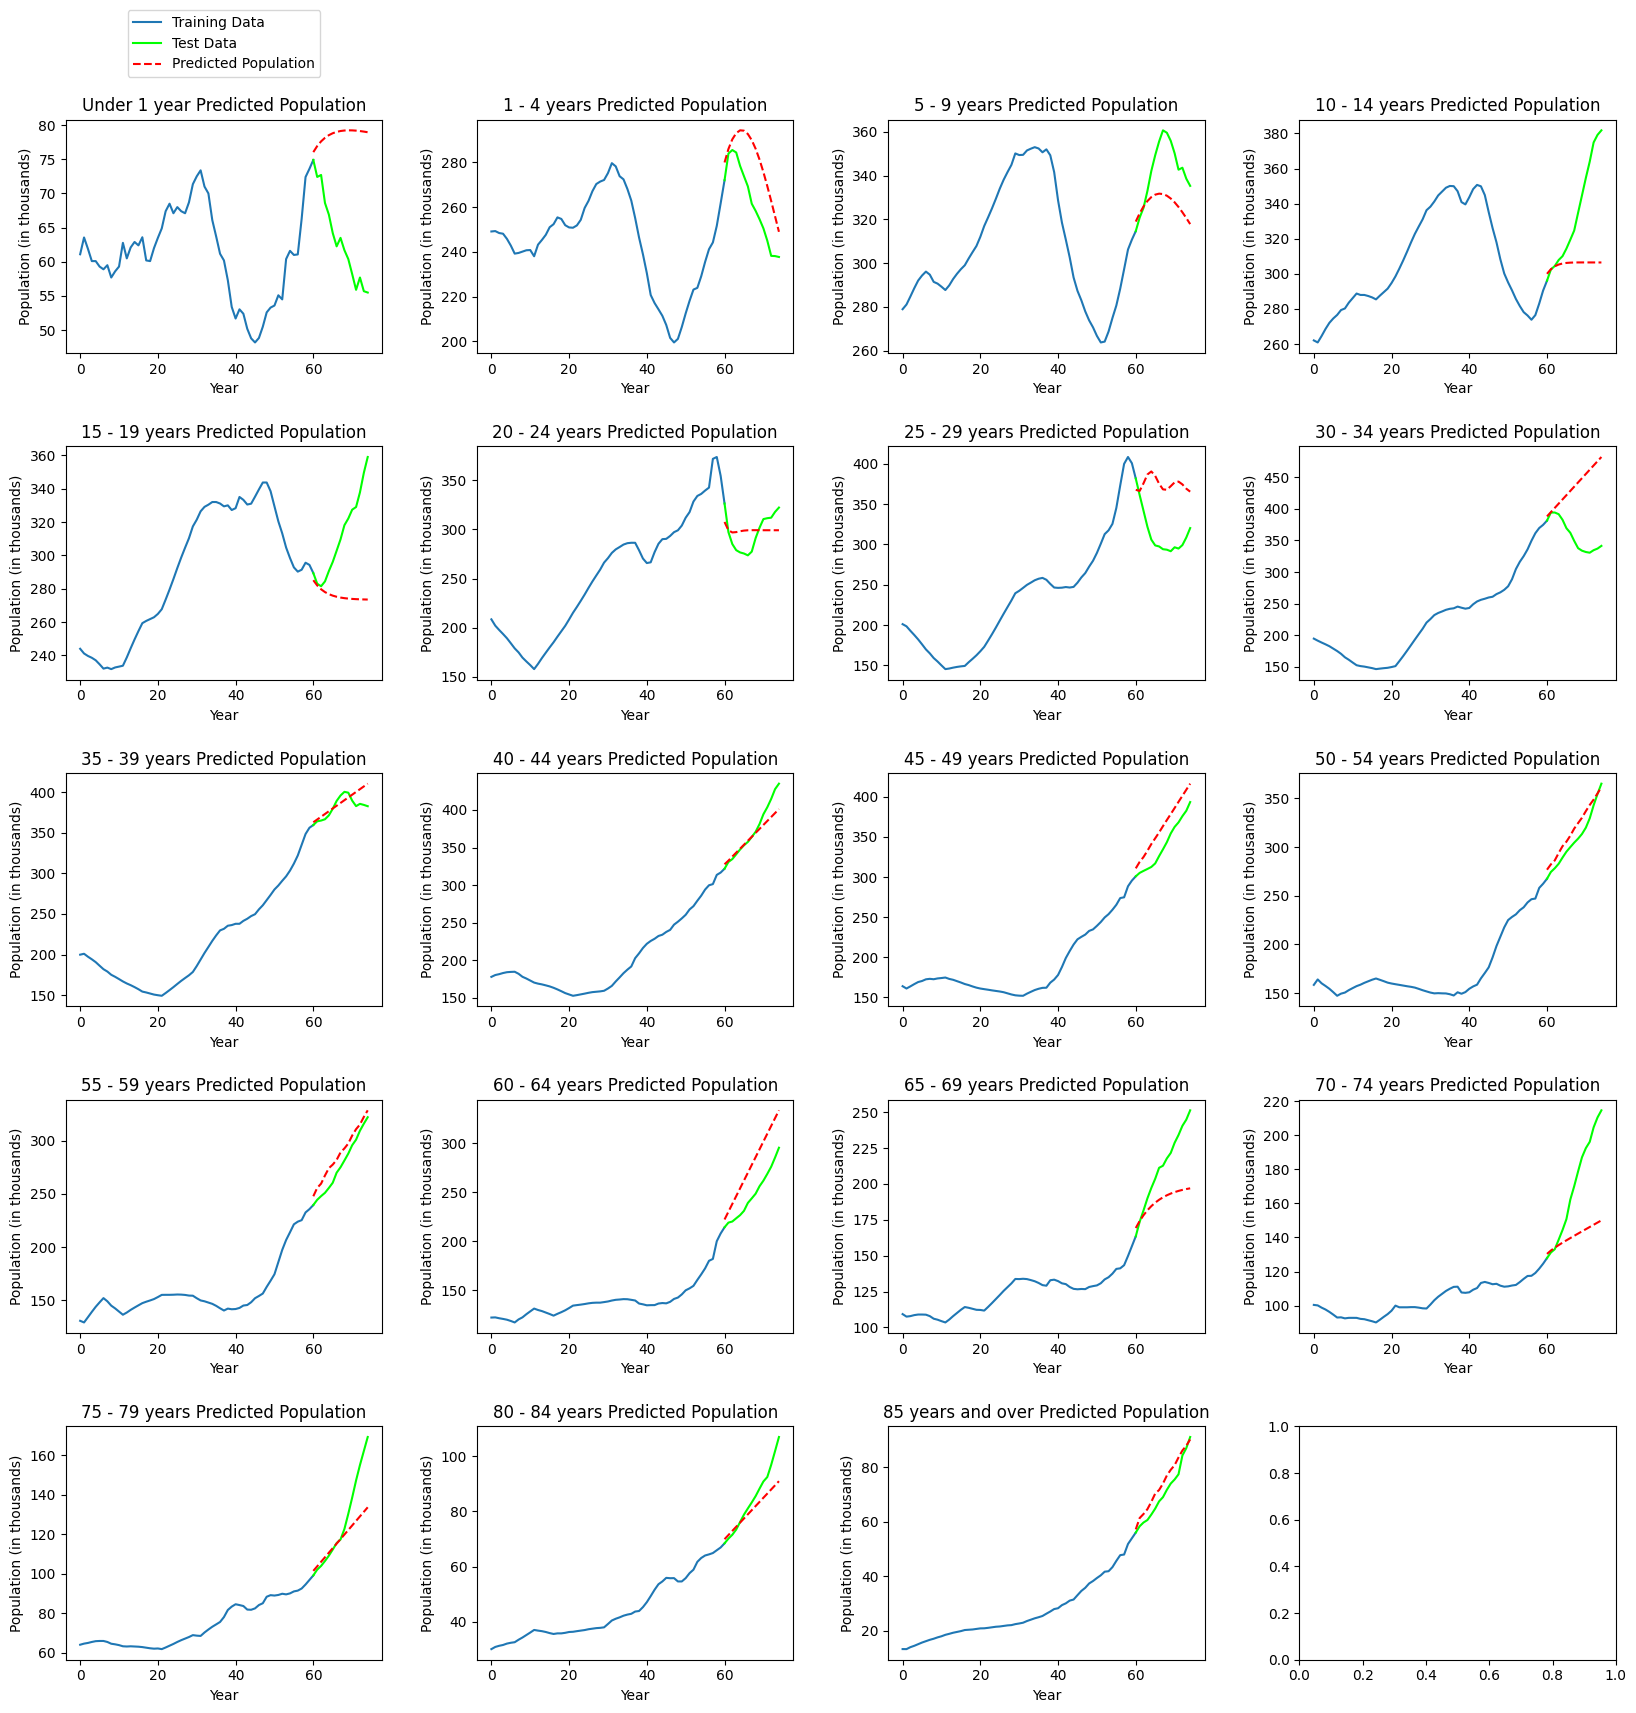

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, forecast, ax in zip(age_groups, forecasts, axes):
    y = train[ag]
    y_test = test[ag]
    
    ax.plot(y.index, y, label='Training Data')
    ax.plot(test.index, y_test, label='Test Data', color='lime')
    ax.plot(test.index, forecast, label=f'Predicted Population', color='red', linestyle='--')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in thousands)')
    # ax.set_ylim(bottom=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

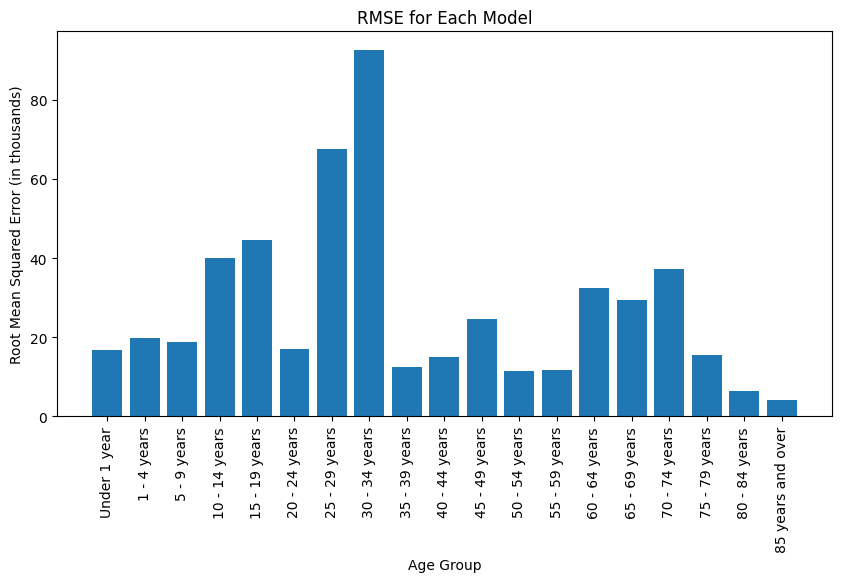

Average RMSE: 27260
Average RMSE for elderly populations: 18550


In [11]:
# Plotting each model's root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error (in thousands)')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', int(avg_rmse * 1000))

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', int(avg_rmse * 1000))